In [1]:
from google.colab import files
uploaded=files.upload()

Saving Bike_Sales_Data.csv to Bike_Sales_Data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Bike_Sales_Data.csv', header=None)

# Assign column names manually
df.columns = ['customer_id', 'age', 'gender', 'income', 'education', 'marital_status',
              'distance_from_store', 'region', 'purchased_bike']


In [10]:
df.columns

Index(['customer_id', 'age', 'gender', 'income', 'education', 'marital_status',
       'distance_from_store', 'region', 'purchased_bike'],
      dtype='object')

In [11]:
df = pd.read_csv('Bike_Sales_Data.csv', header=None)

# Assign column names manually
df.columns = ['customer_id', 'age', 'gender', 'income', 'education', 'marital_status',
              'distance_from_store', 'region', 'purchased_bike']


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [13]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          301 non-null    object
 1   age                  301 non-null    object
 2   gender               301 non-null    object
 3   income               301 non-null    object
 4   education            301 non-null    object
 5   marital_status       301 non-null    object
 6   distance_from_store  301 non-null    object
 7   region               301 non-null    object
 8   purchased_bike       301 non-null    object
dtypes: object(9)
memory usage: 21.3+ KB


np.int64(0)

In [16]:

df = pd.read_csv('Bike_Sales_Data.csv', header=0)

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)


In [18]:
# Age group
bins = [15, 25, 35, 45, 55, 65]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Income group
income_bins = [0, 40000, 70000, 100000, 130000]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)


In [19]:
df.head()

,customer_id,age,gender,income,education,marital_status,commute_distance,region,purchased_bike,age_group,income_group
0,CUST0001,56,Female,68304,Bachelors,Single,2-5 Miles,North,Yes,56-65,Medium
1,CUST0002,46,Male,99449,PhD,Married,1-2 Miles,North,Yes,46-55,High
2,CUST0003,32,Female,112986,High School,Single,1-2 Miles,East,Yes,26-35,Very High
3,CUST0004,60,Male,119643,Bachelors,Single,2-5 Miles,South,Yes,56-65,Very High
4,CUST0005,25,Female,50764,High School,Married,1-2 Miles,East,No,16-25,Medium


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [22]:
age_group_stats = df.groupby('age_group')['purchased_bike'].value_counts(normalize=True).unstack() * 100

/tmp/ipython-input-22-2468825660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')['purchased_bike'].value_counts(normalize=True).unstack() * 100


In [24]:
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

/tmp/ipython-input-52-3596842576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_stats.index, y=age_group_stats['Yes'], palette='coolwarm')


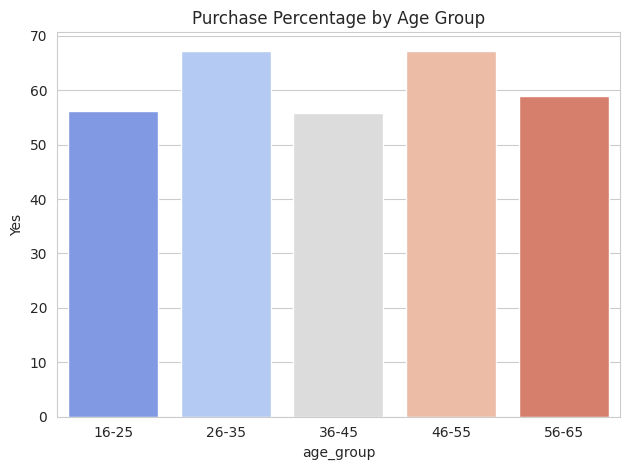

<Figure size 640x480 with 0 Axes>

In [52]:
sns.barplot(x=age_group_stats.index, y=age_group_stats['Yes'], palette='coolwarm')
plt.xlabel=('Age Group')
plt.ylabel=('Purchase Percentage')
plt.title('Purchase Percentage by Age Group')
plt.tight_layout()
plt.show()


In [38]:
df['gender']=df['gender'].str.lower().str.strip()
gender_stats=df.groupby('gender')['purchased_bike'].value_counts(normalize=True).unstack()*100

/tmp/ipython-input-67-3620275753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_stats.index, y=gender_stats['Yes'], palette='viridis')


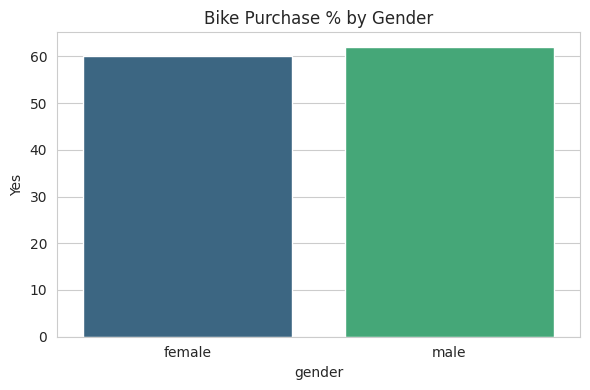

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_stats.index, y=gender_stats['Yes'], palette='viridis')
plt.title('Bike Purchase % by Gender')
plt.xlabel=('Gender')
plt.ylabel=('Purchase Percentage')
plt.tight_layout()
plt.show()


In [56]:
df['income'] = df['income'].astype(int)
income_bins = [0, 40000, 70000, 100000, 130000]
income_labels = ['<40k', '40k-70k', '70k-100k', '100k+']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

/tmp/ipython-input-60-3379786946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_stats = df.groupby('income_group')['purchased_bike'].value_counts(normalize=True).unstack() * 100
/tmp/ipython-input-60-3379786946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_stats.index, y=income_stats['Yes'], palette='viridis')


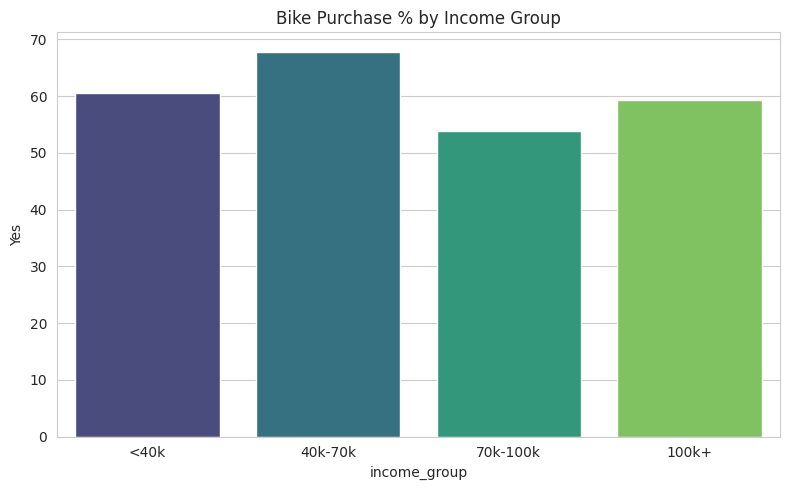

In [60]:
income_stats = df.groupby('income_group')['purchased_bike'].value_counts(normalize=True).unstack() * 100

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.barplot(x=income_stats.index, y=income_stats['Yes'], palette='viridis')
plt.title('Bike Purchase % by Income Group')
plt.xlabel=('Income Group')
plt.ylabel=('Purchase % (Yes)')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>